# 정직하게 코딩하며 배우는 딥러닝 입문 7장

# 챕터 1 퀴즈
- 분류 모델의 정답 타깃의 값은 _이고 나머지 오답타깃의 값은 ___이다
- 소프트 맥스 함수는 다중분류 신경망에서 활성화 출력의 합을 ___로 만들기 위해서 사용한다
- 크로스 엔트로피 손실함수의 미분결과는 로지스틱 손실함수의 미분결과와 ____다.

In [1]:
import numpy as np

In [44]:
# class MultiClassNetwork:
    
#     def __init__(self, units=10, batch_size=32, learning_rate = 0.1, l1=0, l2=0):
#         self.units = units # 은닉층 뉴런의 개수
#         self.batch_size = batch_size #배치크기
#         self.w1 = None # 은닉층의 가중치
#         self.b1 = None # 은닉층의 절편
        
#         self.w2 = None #출력층의 가중치
#         self.b2 = None #출력층의 절편
        
#         self.a1 = None #은닉층의 활성화 뉴런
        
#         self.losses = [] #훈련손실
#         self.val_losses = [] # 검증손실
        
#         self.lr = learning_rate #학습률
#         self.l1 = l1 #L1손실 하이퍼
#         self.l2 = l2 #L2손실 하이퍼
        
#     def forpass(self, x):
#         z1 = np.dot(x, self.w1) + self.b1 #첫번째 층의 선형식을 계산
#         self.a1 = self.sigmoid(z1) #활성화 함수를 적용합니다
#         z2 = np.dot(self.a1, self.w2) + self.b2 #두번째 층의 선형식을 계산합니다.
#         return z2
    
#     def backprop(self, x, err):
#         m = len(x) #샘플개수
        
#         #출력층의 가중치와 절편에 대한 그레디언트 계산
#         w2_grad = np.dot(self.a1.T, err) / m
#         b2_grad = np.sum(err) / m
        
#         #시그모이드 함수까지 그래디언트 계산
#         err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1-self.a1)
        
#         #은닉층의 가중치와 절편에 대한 가중치 계산
#         w1_grad = np.dot(x.T, err_to_hidden) / m
#         b1_grad = np.sum(err_to_hidden, axis= 0 )/ m
#         return w1_grad, b1_grad, w2_grad, b2_grad
    
#     def sigmoid(self, z):
#         z = np.clip(z, -100, None) #안전한 np.exp()계산을 위해
#         a = 1 / (1 + np.exp(-z)) #시그모이드 계산
#         return a

#     def softmax(self, z):
#         #소프트맥스 함수
#         z = np.clip(z, -100, None) #안전한 np.exp()를 계산하기 위해
#         exp_z = np.exp(z)
#         return exp_z / np.sum(exp_z, axis=1).reshape(-1,1)

#     def init_weights(self, n_features, n_classes):
        
#         self.w1 = np.random.normal(0,1, 
#                                    (n_features, self.units)) #특성개수, 은닉층의 크기
#         self.b1 = np.zeros(self.units) #은닉층의 크기
        
#         self.w2 = np.random.normal(0,1,
#                                    (self.units, n_classes)) #은닉층의 크기, 클래스의 개수
#         self.b2 = np.zeros(n_classes)
        
#     def fit(self, x, y, epochs = 100, x_val = None , y_val = None):
#         np.random.seed(42)
#         self.init.weights(x.shape[1], y.shape[1]) #은닉층과 출력층의 가중치를 초기화
        
#         #epochs 만큼 반복
#         for i in range(epochs):
#             loss = 0
#             print('.', end = '')
            
#             #제너레이터 함수에서 반환한 미니배치를 순환합니다
#             for x_batch, y_batch, in slef.gen_batch(x,y):
#                 a = self.training(x_batch, y_batch)
                
#                 #안전한 로그 계산하기 위해 클리핑합니다
#                 a= np.clip(a, 1e-10, 1-1e-10)
                
#                 #로그 손실과 규제손실을 더하여 리스트에 추가합니다
#                 loss += np.sum(-y_batch*np.log(a))
#                 self.losses.append((loss + self.reg_loss()) / len(x)
                
#                 #검증세트에 대한 손실을 계산합니다
#                 # self.update_val_loss(x_val, y_val)
                
#     #미니배치 제너레이터 개수            
#     # 미니배치 제너레이터 함수
#     def gen_batch(self, x, y):
#         length = len(x)
#         bins = length // self.batch_size # 미니배치 횟수
#         if length % self.batch_size:
#             bins += 1                    # 나누어 떨어지지 않을 때
            
#         indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
#         x = x[indexes]
#         y = y[indexes]
#         for i in range(bins):
#             start = self.batch_size * i
#             end = self.batch_size * (i + 1)
#             yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
#     def training(self, x, y):
#         m = len(x)      #샘플 개수를 저장
#         z = self.forpass(x) #정방향 계산을 수행
#         a = self.softmax(z) #활성화 함수를 적용
#         err = -(y - a) #오차를 계산
        
#         #오차를 역전파 후 그레디언트 계산
#         w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        
#         #그레디언트 페널티 항 미분값 뺌
#         w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
#         w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
                
#         #은닝층의 가중치와 절편 업데이트
#         self.w1 -= self.lr * w1_grad
#         self.b1 -= self.lr * b1_grad
        
#         #출력층의 가중치와 절편 업데이트
#         self.w2 -= self.lr * w2_grad
#         self.b2 -= self.lr * b2_grad
        
#         return a
                
#     def predict(self, x):
#         z = self.forpass(x) #정방향 계산을 수행
#         return np.argmax(z, axis =1) #가장 큰 값의 인덱스 반환
        
#     def score(self, x, y):
#         #예측과 타깃 열 벡터를 비교하여 True의 비율을 반환
#         return np.mean(self.predict(x) == np.argmax(y, axis =1))
        
#     def reg_loss(self):
#         #은닉층과 출력층의 가중치에 규제를 적용합니다.
#         return self.l1 * (np.sum(np.abs(self.w1))) + np.sum(np.abs(self.w2)) + \
#             self.l2 / 2 * (np.sum(self.w1 ** 2)) + np.sum(self.w2 ** 2)
            
#     # def update_val_loss(self, x_val, y_val):
#     #     z = self.forpass(x_val) #정방향 계산을 수행합니다.
#     #     a = self.softmax(z) #활성화 함수를 적용합니다
#     #     a = np.clip(a, 1e-10, 1-1e-10) #출력값을 클리핑합니다
        
#     #     #크로스엔트로피 손실과 규제손실을 더하여 리스트에 추가
#     #     val_loss = np.sum(-y_val * np.log(a))
#     #     self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

# 1. MultiClassNetwork구현

In [3]:
class MultiClassNetwork:
    
    def __init__(self, units=10, batch_size=32, learning_rate=0.1, l1=0, l2=0):
        self.units = units         # 은닉층의 뉴런 개수
        self.batch_size = batch_size     # 배치 크기
        self.w1 = None             # 은닉층의 가중치
        self.b1 = None             # 은닉층의 절편
        self.w2 = None             # 출력층의 가중치
        self.b2 = None             # 출력층의 절편
        self.a1 = None             # 은닉층의 활성화 출력
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.lr = learning_rate    # 학습률
        self.l1 = l1               # L1 손실 하이퍼파라미터
        self.l2 = l2               # L2 손실 하이퍼파라미터

    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1        # 첫 번째 층의 선형 식을 계산합니다
        self.a1 = self.sigmoid(z1)               # 활성화 함수를 적용합니다
        z2 = np.dot(self.a1, self.w2) + self.b2  # 두 번째 층의 선형 식을 계산합니다.
        return z2

    def backprop(self, x, err):
        m = len(x)       # 샘플 개수
        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        # 시그모이드 함수까지 그래디언트를 계산합니다.
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        # 은닉층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad
    
    def sigmoid(self, z):
        z = np.clip(z, -100, None)            # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))              # 시그모이드 계산
        return a
    
    def softmax(self, z):
        # 소프트맥스 함수
        z = np.clip(z, -100, None)            # 안전한 np.exp() 계산을 위해
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1).reshape(-1, 1)
 
    def init_weights(self, n_features, n_classes):
        self.w1 = np.random.normal(0, 1, 
                                   (n_features, self.units))  # (특성 개수, 은닉층의 크기)
        self.b1 = np.zeros(self.units)                        # 은닉층의 크기
        self.w2 = np.random.normal(0, 1, 
                                   (self.units, n_classes))   # (은닉층의 크기, 클래스 개수)
        self.b2 = np.zeros(n_classes)
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        np.random.seed(42)
        self.init_weights(x.shape[1], y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            loss = 0
            print('.', end='')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            for x_batch, y_batch in self.gen_batch(x, y):
                a = self.training(x_batch, y_batch)
                # 안전한 로그 계산을 위해 클리핑합니다.
                a = np.clip(a, 1e-10, 1-1e-10)
                # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
                loss += np.sum(-y_batch*np.log(a))
            self.losses.append((loss + self.reg_loss()) / len(x))
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size # 미니배치 횟수
        if length % self.batch_size:
            bins += 1                    # 나누어 떨어지지 않을 때
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                # 샘플 개수를 저장합니다.
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.softmax(z)       # 활성화 함수를 적용합니다.
        err = -(y - a)            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 그래디언트에서 페널티 항의 미분 값을 뺍니다
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        # 은닉층의 가중치와 절편을 업데이트합니다.
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a
   
    def predict(self, x):
        z = self.forpass(x)          # 정방향 계산을 수행합니다.
        return np.argmax(z, axis=1)  # 가장 큰 값의 인덱스를 반환합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def reg_loss(self):
        # 은닉층과 출력층의 가중치에 규제를 적용합니다.
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            # 정방향 계산을 수행합니다.
        a = self.softmax(z)                # 활성화 함수를 적용합니다.
        a = np.clip(a, 1e-10, 1-1e-10)     # 출력 값을 클리핑합니다.
        # 크로스 엔트로피 손실과 규제 손실을 더하여 리스트에 추가합니다.
        
        val_loss = np.sum(-y_val*np.log(a))
        self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

# 2. 의류 이미지 데이터 준비

## 1. 텐서플로 임포트

In [4]:
import tensorflow as tf

tf.__version__

'2.4.1'

## 2. 데이터셋 불러오기

In [5]:
#4개 변수에 나누어서 담음

(x_train_all , y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## 3. 훈련 세트의 크기 확인

In [6]:
# 28 X 28 크기 흑백이미지 60,000개 쌓여있음

print(x_train_all.shape, " && ",y_train_all.shape)

(60000, 28, 28)  &&  (60000,)


## 4. imshow()함수로 샘플 이미지 확인

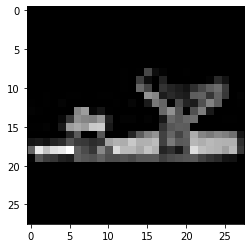

In [48]:
import matplotlib.pyplot as plt

#imshow 함수 넘파이 배열 입력 받아서 이미지 그림
plt.imshow(x_train_all[59999], cmap='gray')
#cmap 매개변수 기본 설정은 viridis이나
# 패선MNIST는 흑백이미지 이므로 gray 로 지정

plt.show()

imshow는 원하는 크기의 행렬을 만들어서 각 칸을 원하는 색으로 채우는 것
각 칸을 채우는 방법은 colormap, RGB, RGBA 의 네가지

colormap 의 디폴트 값이 viridis 로 설정 시 
viridis라는 colormap은 최솟값이 보라, 최댓값이 노랑

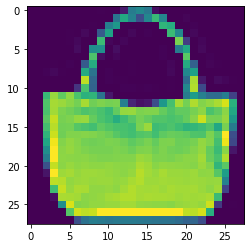

In [49]:
plt.imshow(x_train_all[100])
#cmap 매개변수 기본 설정은 viridis이나
# 패선MNIST는 흑백이미지 이므로 gray 로 지정

plt.show()

## 5. 타깃의 내용과 의미 확인하기

In [9]:
#원소가 어떤레이블 의미하는지 숫자가 아닌 이름으로 나옴

class_names = ['티셔츠/윗도리', '바지', '스웨터', '드레스', '코트', 
               '샌들', '셔츠', '스니커즈', '가방', '앵클부츠']


In [51]:
print(y_train_all[0:10])

[9 0 0 3 0 2 7 2 5 5]


In [11]:
for i in range(10):
    
    print(class_names[y_train_all[i]])

앵클부츠
티셔츠/윗도리
티셔츠/윗도리
드레스
티셔츠/윗도리
스웨터
스니커즈
스웨터
샌들
샌들


## 6. 타깃의 분포 확인하기

In [12]:
#분포가 고르게 됐는지 확인하기

#넘파이 bincount()함수 이용 시
#배열에 있는 정수값의 등장횟수를 세어,  정수값에 해당하는 인덱스 위치에 저장합니다
np.bincount(y_train_all)

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

## 7. 훈련 세트와 검증 세트 고르게 나누기

In [13]:
from sklearn.model_selection import train_test_split

#val 추가하여 오버피팅 방지
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, 

stratify = y_train_all, test_size = 0.2, random_state = 42 )
#test_size는 테스트 셋 구성의 비율 나타냄
#전체 데이터 셋의 20%를 test셋으로 지정 
# 디폴트는 0.25

#stratify 는 분류 다룰 때 중요한 옵션 값
#target 인 y_train_all 으로 지정하면 class비율을 train/val 에 유지 해줌 (즉 한쪽에 쏠려서 분배되는 것 방지함)

#random_state는 세트를 섞을 때 해당 int값을 섞으며, 하이퍼 튜닝시 값 고정해두고 튜닝하면
#매번 데이터 셋 변경된느 것 방지 가능

In [14]:
#훈련, 검증 세트 레이블 잘 나누어졌는지 확인

print(np.bincount(y_train))
print(np.bincount(y_val))

#같은 비율로 나누어짐

[4800 4800 4800 4800 4800 4800 4800 4800 4800 4800]
[1200 1200 1200 1200 1200 1200 1200 1200 1200 1200]


## 8. 입력데이터 정규화 하기

In [15]:
# 유방암 데이터와 마찬가지로 
# 픽셀마다 0~255 사이 값 가진다 
# 이 값을 255로 나누어 0~1사이로 맞춰준다

x_train = x_train / 255
x_val = x_val / 255

print(x_train.shape)
print(x_val.shape)

(48000, 28, 28)
(12000, 28, 28)


## 9. 훈련세트, 검증 세트의 차원 변경하기

In [16]:
# 데이터 셋 은 28 X 28 크기 2차원 배열임
# MultiClassNetwor는 1차원 배열 샘플 기대함

# 넘파이 배열의 reshape() 메서드 사용하여 
# 훈련세으톼 검증세트의 두번째 세번째 차원을 합친 다음 784길이 (28 * 28)로 펼침

# 즉 이미지의 픽셀을 풀어 1줄로 이어 붙임

x_train = x_train.reshape(-1, 784)
x_val = x_val.reshape(-1, 784)

print("2차원 배열에서 1차원 배열로 바꿈")
print(x_train.shape, x_val.shape)


2차원 배열에서 1차원 배열로 바꿈
(48000, 784) (12000, 784)


# 챕터 2 퀴즈

- 패션 데이터 세트는 __차원 배열이며, 각 샘플은 __차원 배열입니다
- 패션 데이터 세트는 샘플에 저장되어있는 값은 ____이다

# 3. 타깃 데이터 준비, 다중분류 신경망훈련|

## 1. 원핫 인코딩 이용

In [17]:
# 신경망 출력, 타깃값 비교하려면
# 타깃값 출력층 10개 뉴런에 대응하는 배열이어야 함

#y_train, y_val 에 저장된 값들 1~9사이 1개 정수값으로 10개 뉴런 대응되지 않음

#따라서 원-핫 인코딩 이용함

#텐서플로 to_categorical() 함수 이용

## 2. to_categorical() 함수 이용

In [52]:
# 샘플

print(tf.keras.utils.to_categorical([0,1,3]))

tf.keras.utils.to_categorical([0,1,3,4,5,6,4,2,3,])

tf.keras.utils.to_categorical([1,1,1,1,1,0,0,0])

#하지만 to_categorical 함수는 문자열로 된 레이블은 인코딩 하지 못함
#그러나 의류 데이터셋은 정수배열이므로 to_categorical함수 이용가능


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [19]:
#변환 전  크기 출력

print(y_train.shape, y_val.shape)

(48000,) (12000,)


In [20]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [21]:
#변환 된 원-핫 인코딩 배열 크기 출력

print(y_train_encoded.shape, y_val_encoded.shape)


print("전 : ", y_train[0], "\n후 : ",y_train_encoded[0])

#6번째에 원소 위치에 원-핫 인코딩 됨

(48000, 10) (12000, 10)
전 :  6 
후 :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## 4. multiClassNetwork클래스로 다중분류 신경망 만들기

In [22]:
# 신경망 40번의 에포크동안 훈련하기

fc = MultiClassNetwork(units=100, batch_size=256)
fc.fit(x_train, y_train_encoded,
       x_val = x_val, y_val= y_val_encoded, epochs =40)

........................................

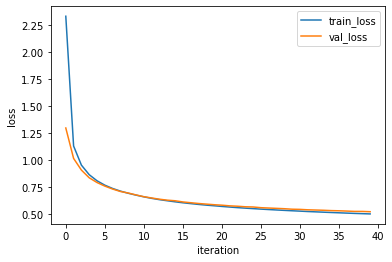

In [23]:
plt.plot(fc.losses)
plt.plot(fc.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

# 그래프 초기에 빠르게 감소하다가 이후 완만하게 수렴

In [24]:
# 전체 검증세트 이용해서 모델 잘 훈련정도 점수 확인
fc.score(x_val, y_val_encoded)

# 모델의 정확도는 81% 무작위로 의류 이미지 예측하면 10%정확도 기대할수 있으므로 더 높은점수임

#그러나 오차 19%는 실전에서 사용하기 어려움으로 텐서플로 이용필요

0.8150833333333334

# 챕터 3 퀴즈

- 패션 데이터셋의 타깃에는 ___사이 __값이 들어있다
- 다중 분류 신경망의 출력 뉴런 개수의 맞게 타깃을 ______하여 __개의 배열로 변환했다.

# 4. 케라스 사용해서 신경망을 만듬 (소개)

케라스 인공신경망 만들기 위해 Sequential 클래스, 완전 연결을 위한 Dense 클래스 제공

- Sequential 클래스 란 순차적으로 층을 쌓은 신경망이고
- Dense 클래스 란 모델에 포함된 완전 연결층을 의미함

'직관적으로 인공신경망의 층을 설계' 하는 것이 장점

- MultiClassNetwork 와의 차이점은
1. 케라스는 모델과 층이 명확하게 구분됨
2. 층 하나를 다른 층으로 교체하기도 쉬움



## 1. Sequential 클래스 사용방법



#### 1. Sequential 객체에 층을 추가

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

#### 2. add()메소드 사용해 층 추가

In [ ]:
dense = Dense()
model.add(dense)

In [27]:
#매번 Dense클래스 객체 변수에 할당해서
# add()메서드로 전달하는 일 번거로움
# 아래와 같이 Dense클래스의 객체를 만들자 마자 전달 가능

model = Sequential()

model.add(Dense())
model.add(Dense())
model.add(Dense())
model.add(Dense())
model.add(Dense())

## 2. Dense 클래스 사용방법

In [ ]:
# 1.뉴런의 개수를 지정하는 매개변수 unit (하이퍼파라미터 임)

Dense(units=100)

# 2. 활성화 함수를 지정하는 매개변수 activation
#기본값은 none상태임

Dense(units=100, activation='sigmoid')

## 3. 모델의 최적화 알고리즘과 손실함수 설정

In [ ]:
# 다중분류의 최적화 알고리즘은 경사하강법 알고리즘 이용
# 다중분류의 손실함수는 크로스엔트로피 손실함수 사용


# 최적화 알고리즘은 매개변수 optimizer 사용
# optimize = 'sgd' 지정 시 기본 경사 하강법을 최적화 알고리즘으로 사용
model.compile(optimizer = 'sgd')



In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy')

## 4. 모델을 훈련하고 에측함 

In [ ]:
# 레이어 선언
model = Sequential()
model.add(Dense())
model.add(Dense())

# 최적과 알고리즘, 손실함수 설정
model.compile(optimize=' ', loss = '  ')

# 모델 훈련하고 예측 그리고 평가
model.fit(X, y , epochs = )
model.predict(X)
model.evalute(X, y)



# 5. 케라스로 다중분류 신경망 만들기

## 1. 모델생성하기

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# model 객체 선언
model = Sequential()

## 2. 은닉층과 출력층을 모델에 추가하기



In [53]:
# 은닉층 유닛 개수 100개
# 은닉층 활성화 함수 시그모이드 함수

# 이때 input_shape 매개변수에 입력데이터 크기 지정해야한다
# 28 28 크기 이미지 일렬로 펼쳤으므로 784이다
# 신경망 구성할 때 샘플의 개수는 필요하지 않음
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))

# 출력층 유닛 개수 10개
# 출력층 활성호 함수 소프트맥수 함수
model.add(Dense(10, activation='softmax'))

## 3. 최적화 알고리즘과 손실함수 지정하기

In [54]:
#다중 분류문제 해결해야함
# 최적화 알고리즘 선택 adam, sgd, rmsprop, adagrad 등
# 손실함수 선택 mse, categorical_crossentropy, binary_crossentropy 

# metrics 매개변수는 훈련 과정 기록으로 정확도를 남기기 위해 추가한 것
# metrics 매개변수에 accuracy추가해서 모델의 정확도에 대한 기록도 살펴 봄
# 분류에서는 accuracy, 회귀에서는 mse, rmse, r2, mae, mspe, mape, msle 등

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (

In [32]:
# fit() 매서드 통해서 모델을 40번의 에포크동안 훈련함
# 훈련하는 동안 기록한 정보를 [History클래스 객체]에 담아서 반환 함
# 반환 값 [history 변수]에 저장

# validation_data 매게변수에 검증 셋트 튜플로 전달 함


history = model.fit(x_train, y_train_encoded, epochs=40,
                    validation_data = (x_val, y_val_encoded) )

Epoch 1/40
1500/1500 [==============================] - 4s 2ms/step - loss: 1.7150 - accuracy: 0.5438 - val_loss: 0.9582 - val_accuracy: 0.7327
Epoch 2/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8928 - accuracy: 0.7389 - val_loss: 0.7452 - val_accuracy: 0.7618
Epoch 3/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7288 - accuracy: 0.7629 - val_loss: 0.6602 - val_accuracy: 0.7797
Epoch 4/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6477 - accuracy: 0.7815 - val_loss: 0.6111 - val_accuracy: 0.7922
Epoch 5/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6106 - accuracy: 0.7899 - val_loss: 0.5756 - val_accuracy: 0.8039
Epoch 6/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5781 - accuracy: 0.8018 - val_loss: 0.5502 - val_accuracy: 0.8114
Epoch 7/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5559 - accuracy: 0.8080 - val_loss: 0.5298 - val_accuracy:

## 4. 손실과 정확도 그래프 그리기



In [35]:
# history 객체의 history 딕셔너리 여러 측정 지표가 있음

print(history.history.keys())

#크게 훈련세트와 검증세트의 손실과 정확도를 나타냄

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


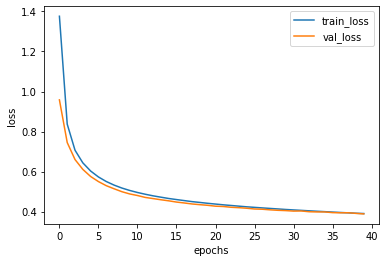

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend(['train_loss', 'val_loss'])
plt.show()

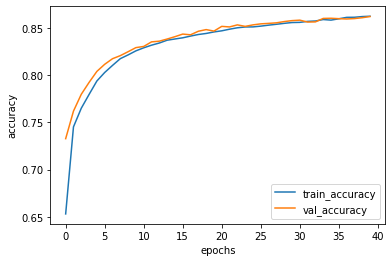

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

## 5. 검증세트 정확도 계산

In [43]:
# evaluate 메서드 사용하면 손실값, 

loss, accuracy = model.evaluate(x_val, y_val_encoded, verbose=0)
print("정확도 : ", accuracy)

# 정확도 86% 케라스 이용하면 더 '좋은 성능'과 '간단한 방법'으로 다중 분류 신경망 구현

# 그러나 뛰어나게 좋지 않은 이유는 케라스 성능이 나쁜것이 아니라
# 이미지 데이터에 잘 맞는 모델이 아니기 때문

# 합성곱 신경망에 대해서 살펴 볼 예정 (CNN!!!!!! 개봉박두!!!!!!!!!!!!!!!!!!!!)
재밌쥬???

정확도 :  0.8619999885559082


https://www.ted.com/talks/fei_fei_li_how_we_re_teaching_computers_to_understand_pictures?language=ko

# 챕터 4 퀴즈
- ___는 테서플로 비롯한 여러 딥러닝 패키지 쉽게 사용하도록 만들어진 래퍼 패치키지 이다.
- 케라스는 ____클래스로 신경망을 구현하고, ___클래스로 층을 구현한다

# 